## Outlier & 處理

**處理方法**
1. 新增欄位用以紀錄異常與否
2. 填補（取代）
3. 視情況以 Median/Min/Max/Mean/NA填補
4. 整欄不用

### Ways to Detect Outliers

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

There are 2 types of analysis we will follow to find the outliers-Univariate (one variable outlier analysis) and Multi_variate(two or more variable outlier analysis).

### Discover Outlier with visualization tools

**Box Plot**

In [1]:
import pandas as pd
df = pd.read_csv('data/application_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


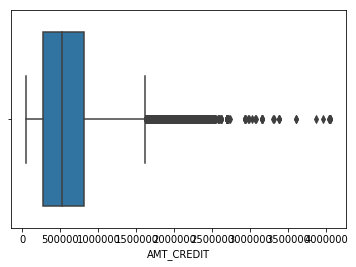

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.boxplot(x=df['AMT_CREDIT']);

**Scatter plot**

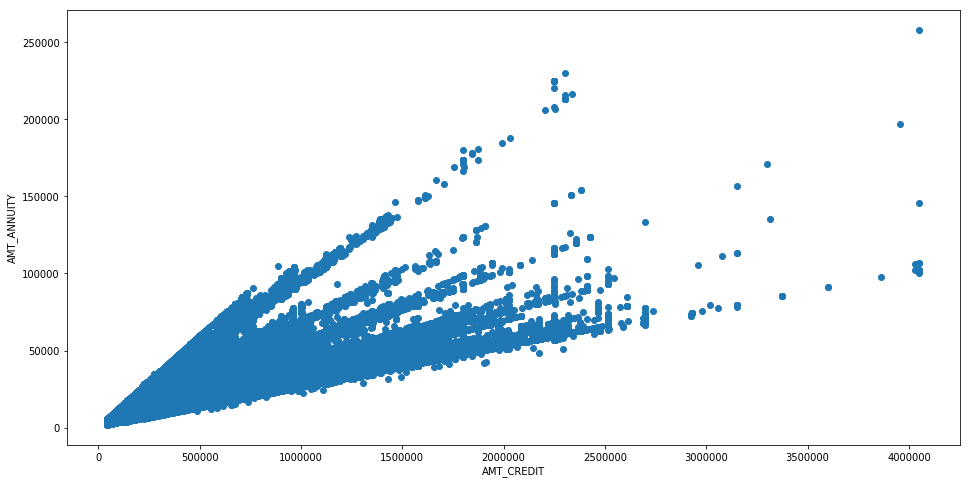

In [3]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['AMT_CREDIT'], df['AMT_ANNUITY'])
ax.set_xlabel('AMT_CREDIT')
ax.set_ylabel('AMT_ANNUITY')
plt.show()

**Z-Score**  

*The Z-score is the signed number of standard deviations by whichthe value of an observation or data point is above the mean value of what is being observed or measured.* 

The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points.   
Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

While calculating the Z-score, we re-scale and center the data and look for data points which are too far from zero.  
These data points which are way too far from zero will be treated as the the outliers.

In most of the cases a threshold of 3 or -3 is used. (if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [4]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df['AMT_CREDIT']))
print(z)

[0.47809496 1.7254498  1.15288792 ... 0.19537871 0.56875681 0.18875991]


However, it is difficult to say which data point is an outlier.  
Let's try and define a threshold to identify and outlier.

In [5]:
threshold = 3
print(np.where(z>3))

(array([   189,    337,    341, ..., 307214, 307216, 307422]),)


**IQR Score**

Box plot use the IQR method to display data and outliers (shape of the data) but in order to get a list of identified outlier, we will  need to use the mathematical formula and retrieve the ourlier data.

**IQR (The interquartile range)** also called the **midspread** or **middle 50%** or technically **H-spread**, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentile, or between upper and lower quartiles, IQR = Q3-Q1

In [6]:
Q1 = df['AMT_CREDIT'].quantile(0.25)
Q3 = df['AMT_CREDIT'].quantile(0.75)

IQR = Q3-Q1

In [7]:
df[(df['AMT_CREDIT']<(Q1-1.5*IQR)) | (df['AMT_CREDIT']>(Q3+1.5*IQR))].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
60,100071,0,Cash loans,F,N,Y,0,180000.0,1663987.5,86989.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0
135,100157,0,Cash loans,M,N,Y,0,180000.0,1755000.0,61132.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
189,100219,0,Cash loans,M,N,Y,1,315000.0,2250000.0,83515.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
235,100273,1,Cash loans,F,N,Y,0,157500.0,1710000.0,66262.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
314,100361,0,Cash loans,M,N,Y,0,270000.0,1800000.0,62698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0


### Working with Outliers: Correcting, Removing

## 作業

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
column = pd.read_csv('data/HomeCredit_columns_description.csv', index_col=False)
column

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [10]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                   

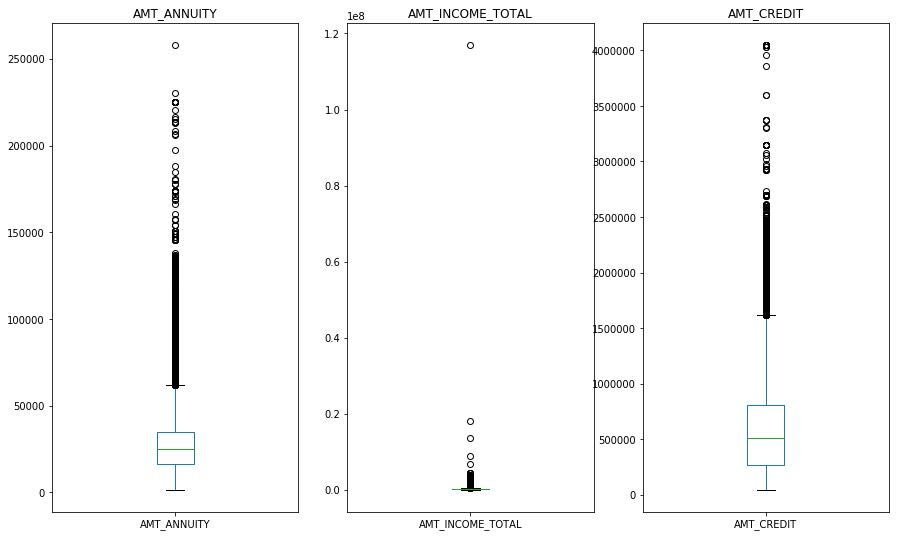

In [11]:
fig, axes = plt.subplots(1,3,figsize=(15,9))
fig.subplots_adjust(hspace=1)

df['AMT_ANNUITY'].plot(kind='box',rot=0,ax=axes[0],title='AMT_ANNUITY')
df['AMT_INCOME_TOTAL'].plot(kind='box',rot=0,ax=axes[1],title='AMT_INCOME_TOTAL')
df['AMT_CREDIT'].plot(kind='box',rot=0,ax=axes[2],title='AMT_CREDIT')

plt.show()